<a href="https://colab.research.google.com/github/Verinikita/Verinikita/blob/main/TECNICAS_DE_OPTIMIZACI%C3%93N_APLICADAS_A_LA_BIOINFORM%C3%81TICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TECNICAS DE OPTIMIZACIÓN APLICADAS A LA BIOINFORMÁTICA <BR>**
*“Diseño e implementación de algoritmo simulated annealing (SA) en Python, para resolver el problema de distribución en el ensamblado de fragmentos (FAP) por permutación”.*



## UNIVERSIDAD NACIONAL DEL NORESTE DE BUENOS AIRES

>>>>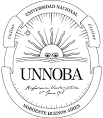

MAESTRÍA EN BIOINFORMÁTICA Y BIOLOGÍA DE SISTEMAS

TRABAJO FINAL PARA LA CÁTEDRA “TÉCNICAS DE OPTIMIZACIÓN APLICADAS A LA BIOINFORMÁTICA”

AUTORES:
BALUK, María Inés
BARONETTO, Verónica
KRANEVITER, Anabel
RECALDE, José



DOCENTE:
MINETTI, Gabriela


2023




In [ ]:
#Cargo las Librerías necesarias:
try:
    import google.colab
    # Running on Google Colab, so install Biopython first
    !pip install biopython
except ImportError:
    pass

import Bio
import random
from Bio import SeqIO


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
# Función de costo
def costo(ensamblado):
    puntaje = 0
    for i in range(len(ensamblado[0])):
        # Obtener el aminoácido en la posición i de cada secuencia
        aminoacidos = [secuencia[i] for secuencia in ensamblado]
        # Si al menos una secuencia tiene un gap, el puntaje es -1
        if "-" in aminoacidos:
            puntaje -= 1
        # Si todas las secuencias tienen el mismo aminoácido match, el puntaje es +2
        elif len(set(aminoacidos)) == 1:
            puntaje += 2
        # Si hay al menos dos aminoácidos diferentes, el puntaje es 0 
        #Acá no supimos como hacer para representar los mismatch
        else:
            puntaje += 0
    return puntaje

# Función de ensamblado aleatorio
def ensamblado_aleatorio(secuencias):
    return ["".join(random.choice(["-", aa]) for aa in secuencia) for secuencia in secuencias]

# Recocido simulado
def recocido_simulado(secuencias, temp_inicial=10, temp_final=0.1, factor_enfriamiento=0.95, max_iter=1000):
    # Generar ensamblado inicial aleatorio
    ensamblado_actual = ensamblado_aleatorio(secuencias)
    costo_actual = costo(ensamblado_actual)
    mejor_ensamblado = ensamblado_actual
    mejor_costo = costo_actual
    
    # Recocido simulado
    temp = temp_inicial
    for i in range(max_iter):
        # Modificar ensamblado actual
        nueva_ensamblado = []
        for secuencia in ensamblado_actual:
            posicion = random.randint(0, len(secuencia) - 1)
            nuevo_aa = random.choice(["-", secuencia[posicion]])
            nueva_secuencia = secuencia[:posicion] + nuevo_aa + secuencia[posicion+1:]
            nueva_ensamblado.append(nueva_secuencia)
        nuevo_costo = costo(nueva_ensamblado)
        # Aceptar solución si es mejor
        if nuevo_costo > costo_actual:
            ensamblado_actual = nueva_ensamblado
            costo_actual = nuevo_costo
            if costo_actual > mejor_costo:
                mejor_ensamblado = ensamblado_actual
                mejor_costo = costo_actual
        # Aceptar solución con cierta probabilidad si es peor
        else:
            delta_costo = nuevo_costo - costo_actual
            prob_aceptacion = min(1, pow(2.71, delta_costo / temp))
            if random.random() < prob_aceptacion:
                ensamblado_actual = nueva_ensamblado
                costo_actual = nuevo_costo
        # Enfriamiento
        temp *= factor_enfriamiento
        if temp < temp_final:
            break
    return mejor_ensamblado, mejor_costo

# Cargar secuencias desde archivo FASTA
# Leer las secuencias del archivo FASTA
archivo_fasta = input("Ingrese el nombre del archivo FASTA: ")
secuencias = []
for secuencia in SeqIO.parse(archivo_fasta, "fasta"):
    secuencias.append(str(secuencia.seq))



#secuencias = list(SeqIO.parse("secuencias.fasta", "fasta"))
# Ejecutar recocido simulado
ensamblado_actual = ensamblado_aleatorio(secuencias)
costo_actual = costo(ensamblado_actual)
mejor_ensamblado, mejor_costo = recocido_simulado(secuencias)
print("El primer ensamblaje fue:", ensamblado_actual)
print("Con el primer ensamblaje aleatoreo se obtuvo un costo de:", costo_actual)
print("Mejor ensamblado:", mejor_ensamblado)
print("Mejor costo:", mejor_costo)

Ingrese el nombre del archivo FASTA: /content/proteins.FASTA
El primer ensamblaje fue: ['MTEY-LVV-GAG-V-K--L---LI--H-VDEYDPTI---YRKQ--I-GE-CL-D--DT--Q-E-S-MR-Q---T-EG---VF----T--FE--H--R-Q-KR--D--DVP-V--GN---LP-R-V--K---DLA-SYG-P-I-TS--TR-GV-DAF---V-E------K--K--K-K-K-S----VI-', 'M---K--VVG---VGK-ALTI---QNH----YDP-I-DSYRK-V-ID-----LD--D-AG-E-YSA-R--YM---E-F-C---I-N---FED--H-R-QI--V--S-D--MVL-------PS--V-T-QAQDLAR-YG-----T-A-T-QG--DAFYTL--EI--HK--M-KDGKKK--KS---C-IM', '-T-Y-LVV--A--V-KS--TIQ--Q-HF------TI--SY---V---GET-L--ILDT-GQ-E-S-MR-QY-RTGEGF-C----NN-KSF--IH-Y-EQ--RV----DVPMVL-G-----P--T-D-K-------SYG---I--S------V-DAF-TLVRE--K----MSKDGK---K-S-TKCV--', '----QSD----P-LSQETFS-LW--LPE-N-L---PSQ-M-D---S-D--EQW-T-DP---EAP-M-EAAP--A-AP-A------A-APS---SS-V--Q--Y---Y--R---LH--TA-S--CT-SP-L-KMF--LAKT-PV--W------P--R--AMAI-K-SQHM---V--C---E--SDSD---PP--LIRVEGNLR--YL---NT-RHS---PY-P---G-DCTTIHYNYMC-SSC--GM-----LTIIT----SG--LGR-------CACP-R-R-T--ENLR--GE-H-EL-P--TKR-LPN-T----QP--K--D-E--T--DQTS